# Simple Linear Regression

### Xuanjun (Jason) Gong

## Regression model Ingredients

In regression models, we have a set of independent (predictor) variables and one response (dependent) variable. 

Note: when we have multiple dependent variables, either use multivariate regression model or build several regression models independently for each dependent variable. 

For regression models, we will have a fixed component, denoted as $X$, consisting of independent variables and the intercept (we will talk about intercept a bit later), as well as a random component which accounts for the random distribution of response variables given $X$.

Thus, a big difference between correlation and regression is that

- Correlation treats both independent variable and dependent variable as random variables
- Regression consider only dependent variable as a random variable, and consider the predictors as fixed and known values. 

## Regression model Ingredients

![regression1](./img/regression_model.png)

## Regression model Ingredients

![regression2](./img/regression_model_2.jpeg)

## Regression model 

### Data Example

Suppose we want to know if there is a linear relationship between children's height and the average of their parent's height. 

Here is a dataset of 1886 Galton's observations on children's and their parents' heights.


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

children_height_df = pd.read_csv("./data/GaltonFamilies.csv")
# q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
children_height_df["midparentHeight_bins"] = pd.cut(children_height_df["midparentHeight"],
                                                     bins=10)
children_height_df["midparentHeight_bins"] = children_height_df.midparentHeight_bins.apply(lambda x:x.mid)
children_height_df.head()

,rownames,family,father,mother,midparentHeight,children,childNum,gender,childHeight,midparentHeight_bins
0,1,001,78.5,67.0,75.43,4,1,male,73.2,74.8785
1,2,001,78.5,67.0,75.43,4,2,female,69.2,74.8785
2,3,001,78.5,67.0,75.43,4,3,female,69.0,74.8785
3,4,001,78.5,67.0,75.43,4,4,female,69.0,74.8785
4,5,002,75.5,66.5,73.66,4,1,male,73.5,73.7755


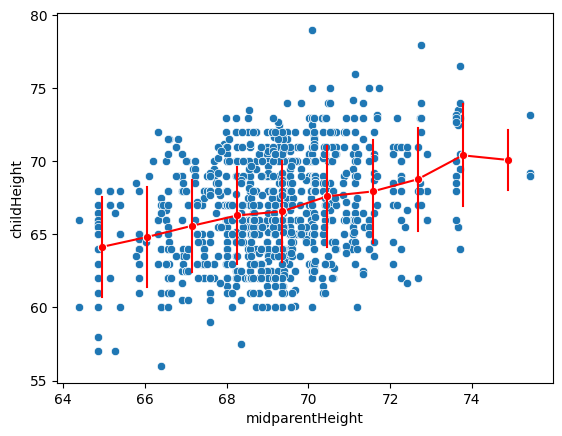

In [61]:
sns.scatterplot(data=children_height_df, x="midparentHeight", y="childHeight")
sns.lineplot(data=children_height_df, x="midparentHeight_bins", y="childHeight",
             err_style="bars", marker='o', color="red", errorbar="sd")
plt.show()

## Regression Ingredient

From the visualization of the data, we can observe that

1. The average children's height is approximately in a straight line across each bin of the mid parent height.
2. The degree of dispersion (variance) is roughly the same across each bin.

## Regression Ingredient

Thus, for a simple regression model, we specify two components:

### Fixed component

The mean of the childrens' height $Y$ is a linear function of midparent's height $X$.

$$
E[Y] = \beta_0 + \beta_1 X
$$

### Random component
The distribution of children's height have a constant variance.
$$
Var(Y) = \sigma^2
$$

Adding them together, we will have a simple linear regression model

$$
Y_i = \beta_0 + \beta_1 X_i + \epsilon_i
\\
Var(\epsilon_i) = \sigma^2
$$